HOTEL REVIEW

Import the necessary modules.

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the data set.

In [21]:
df= pd.read_csv("Hotel_Reviews (1).csv" , sep=",")
print(df)

                                            Hotel_Address  \
0        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
...                                                   ...   
515733  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
515734  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
515735  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
515736  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
515737  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   

        Additional_Number_of_Scoring Review_Date  Average_Score  \
0                                194    8/3/2017            7.7   
1                                194    8/3/2017            7.7   
2                                194   7/31/2017            7.7   

In [27]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


Find the number of rows and columns.

In [31]:
rows, cols = df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 515738
Number of columns: 17


Looking for 
missing values.

In [42]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
lat    3268
lng    3268
dtype: int64


Droping the unnecessary columns.

In [83]:
columns_to_drop = ['Tags', 'days_since_review', 'Additional_Number_of_Scoring']
df = df.drop(columns=columns_to_drop)
print(df.head())

                                       Hotel_Address Review_Date  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...    8/3/2017   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...    8/3/2017   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   7/31/2017   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   7/31/2017   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   7/24/2017   

   Average_Score   Hotel_Name Reviewer_Nationality  Total_Number_of_Reviews  \
0            7.7  Hotel Arena              Russia                      1403   
1            7.7  Hotel Arena             Ireland                      1403   
2            7.7  Hotel Arena           Australia                      1403   
3            7.7  Hotel Arena      United Kingdom                      1403   
4            7.7  Hotel Arena         New Zealand                      1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   

Looking for any anomalies in the dataset.

Check for duplicate rows

In [49]:
duplicate_rows = df[df.duplicated()]
print(f"\nNumber of duplicate rows: {duplicate_rows.shape[0]}")


Number of duplicate rows: 537


Display the duplicate rows if any

In [52]:
if duplicate_rows.shape[0] > 0:
    print("Duplicate rows:")
    print(duplicate_rows)

Duplicate rows:
                                            Hotel_Address  \
10426   1 Inverness Terrace Westminster Borough London...   
23704   100 110 Euston Road Camden London NW1 2AJ Unit...   
61876   16 22 Great Russell Street Camden London WC1B ...   
68967         167 rue de Rome 17th arr 75017 Paris France   
68968         167 rue de Rome 17th arr 75017 Paris France   
...                                                   ...   
472671  Via Cusani 13 Milan City Center 20121 Milan Italy   
480753  Via Lucio Giunio Columella 36 Distretto Viale ...   
487021  Via San Raffaele 6 Milan City Center 20121 Mil...   
489215                 Via Senigallia 6 20161 Milan Italy   
492718           Via Tortona 35 Navigli 20144 Milan Italy   

        Additional_Number_of_Scoring Review_Date  Average_Score  \
10426                           1274   7/21/2016            7.7   
23704                            728   2/25/2017            8.9   
61876                            300   7/27/2017  

Get descriptive statistics for numerical columns to find outliers

In [55]:
descriptive_stats = df.describe()
print("\nDescriptive statistics for numerical columns:")
print(descriptive_stats)


Descriptive statistics for numerical columns:
       Additional_Number_of_Scoring  Average_Score  Total_Number_of_Reviews  \
count                 515738.000000  515738.000000            515738.000000   
mean                     498.081836       8.397487              2743.743944   
std                      500.538467       0.548048              2317.464868   
min                        1.000000       5.200000                43.000000   
25%                      169.000000       8.100000              1161.000000   
50%                      341.000000       8.400000              2134.000000   
75%                      660.000000       8.800000              3613.000000   
max                     2682.000000       9.800000             16670.000000   

       Review_Total_Positive_Word_Counts  \
count                      515738.000000   
mean                           17.776458   
std                            21.804185   
min                             0.000000   
25%                  

Check for anomalies in categorical columns

In [58]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for Hotel_Address:
Hotel_Address
163 Marsh Wall Docklands Tower Hamlets London E14 9SJ United Kingdom              4789
372 Strand Westminster Borough London WC2R 0JJ United Kingdom                     4256
Westminster Bridge Road Lambeth London SE1 7UT United Kingdom                     4169
Scarsdale Place Kensington Kensington and Chelsea London W8 5SY United Kingdom    3578
7 Pepys Street City of London London EC3N 4AF United Kingdom                      3212
                                                                                  ... 
21 rue Lavoisier 8th arr 75008 Paris France                                         12
2 4 Boundary Street Hackney London E2 7DD United Kingdom                            12
Via M Buonarroti 13 Fiera Milano City 20149 Milan Italy                             10
13 Rue Fran ois Ory 92120 Paris France                                              10
Johann Staud Stra e 32 16 Ottakring 1160 Vienna Austria                            

Clean the data (e.g., remove duplicates, handle missing values)

Remove duplicate rows

In [64]:
df = df.drop_duplicates()
print(df)

                                            Hotel_Address  \
0        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
...                                                   ...   
515733  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
515734  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
515735  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
515736  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
515737  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   

        Additional_Number_of_Scoring Review_Date  Average_Score  \
0                                194    8/3/2017            7.7   
1                                194    8/3/2017            7.7   
2                                194   7/31/2017            7.7   

Handle missing values (for example, fill with the median for numerical columns)

In [69]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)
    print(df)

                                            Hotel_Address  \
0        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
...                                                   ...   
515733  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
515734  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
515735  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
515736  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
515737  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   

        Additional_Number_of_Scoring Review_Date  Average_Score  \
0                                194    8/3/2017            7.7   
1                                194    8/3/2017            7.7   
2                                194   7/31/2017            7.7   

For categorical columns, you might choose to fill with a placeholder or mode

In [76]:
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna('Unknown', inplace=True)
    print(df)

                                            Hotel_Address  \
0        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
...                                                   ...   
515733  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
515734  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
515735  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
515736  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
515737  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   

        Additional_Number_of_Scoring Review_Date  Average_Score  \
0                                194    8/3/2017            7.7   
1                                194    8/3/2017            7.7   
2                                194   7/31/2017            7.7   

Create a correlation heatmap and write the inference.

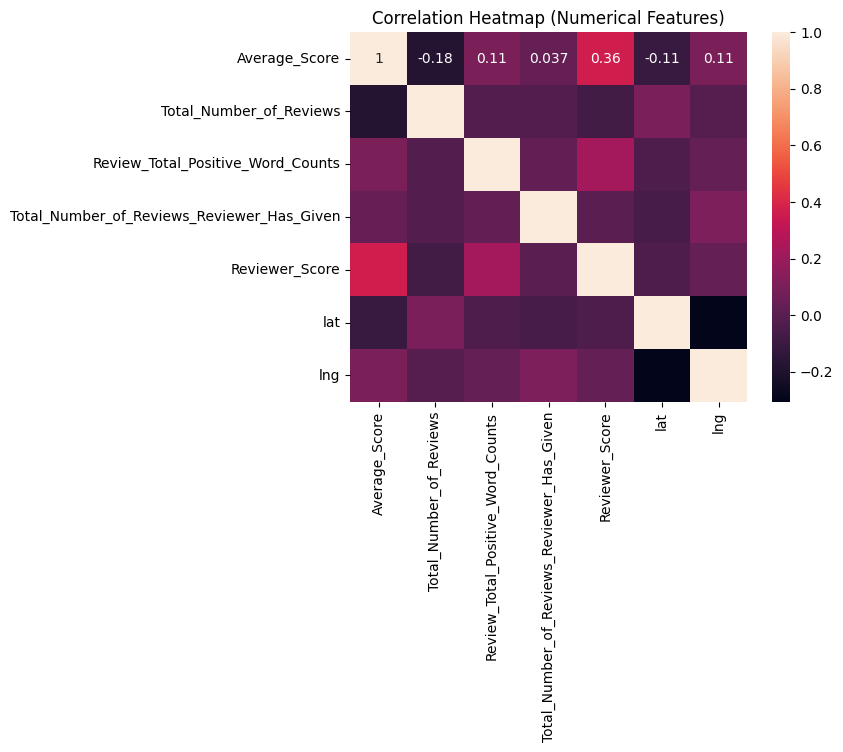

In [98]:
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

Plot the worst top 10 hotels according to the reviewer score

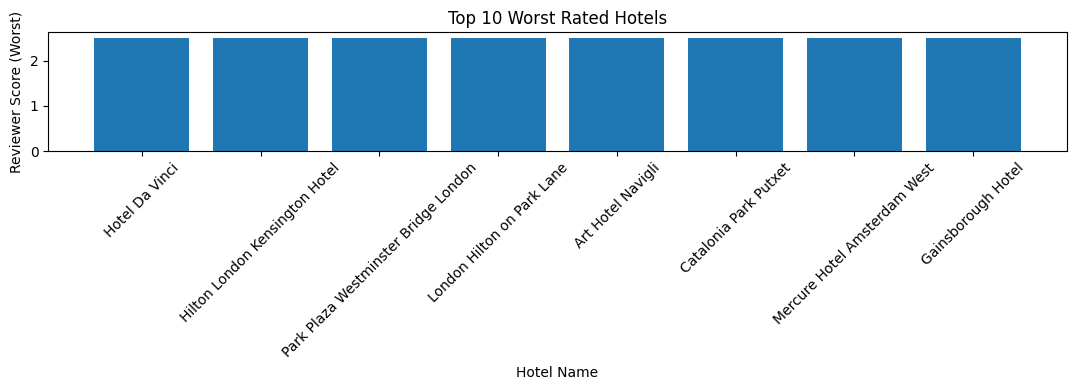

In [101]:
worst_hotels = df.sort_values(by='Reviewer_Score').head(10)
plt.figure(figsize=(11,4))
plt.bar(worst_hotels['Hotel_Name'], worst_hotels['Reviewer_Score'])
plt.xlabel('Hotel Name')
plt.ylabel('Reviewer Score (Worst)')
plt.title('Top 10 Worst Rated Hotels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Plot the top best hotel according to the reviewer score


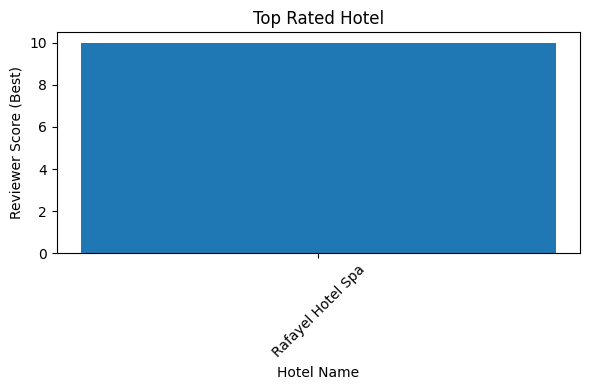

In [104]:
best_hotel = df.sort_values(by='Reviewer_Score', ascending=False).head(1)
plt.figure(figsize=(6,4))
plt.bar(best_hotel['Hotel_Name'], best_hotel['Reviewer_Score'])
plt.xlabel('Hotel Name')
plt.ylabel('Reviewer Score (Best)')
plt.title('Top Rated Hotel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
